## Analyzing Simulated HRIS Dataset for Termination Prediction ##

### 1. Importing the necessary libraries and loading the data

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from nltk import ConfusionMatrix

# Optional display settings
pd.set_option('display.max_rows', 15)
pd.set_option('precision',4)

In [2]:
df = pd.read_csv('data/raw_data.csv')

### 2. Inital data exploration

In [3]:
print(df.shape)

(49653, 18)


In [4]:
df.head(15)

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
5,1318,12/31/2011 0:00,1/3/1954,8/28/1989,1/1/1900,57,22,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2011,ACTIVE,HEADOFFICE
6,1318,12/31/2012 0:00,1/3/1954,8/28/1989,1/1/1900,58,23,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2012,ACTIVE,HEADOFFICE
7,1318,12/31/2013 0:00,1/3/1954,8/28/1989,1/1/1900,59,24,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2013,ACTIVE,HEADOFFICE
8,1318,12/31/2014 0:00,1/3/1954,8/28/1989,1/1/1900,60,25,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2014,ACTIVE,HEADOFFICE
9,1318,12/31/2015 0:00,1/3/1954,8/28/1989,1/1/1900,61,26,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49653 entries, 0 to 49652
Data columns (total 18 columns):
EmployeeID             49653 non-null int64
recorddate_key         49653 non-null object
birthdate_key          49653 non-null object
orighiredate_key       49653 non-null object
terminationdate_key    49653 non-null object
age                    49653 non-null int64
length_of_service      49653 non-null int64
city_name              49653 non-null object
department_name        49653 non-null object
job_title              49653 non-null object
store_name             49653 non-null int64
gender_short           49653 non-null object
gender_full            49653 non-null object
termreason_desc        49653 non-null object
termtype_desc          49653 non-null object
STATUS_YEAR            49653 non-null int64
STATUS                 49653 non-null object
BUSINESS_UNIT          49653 non-null object
dtypes: int64(5), object(13)
memory usage: 6.8+ MB
None


In [6]:
df.describe()

,EmployeeID,age,length_of_service,store_name,STATUS_YEAR
count,49653.0000,49653.0000,49653.0000,49653.0000,49653.0000
mean,4859.4957,42.0770,10.4346,27.2976,2010.6126
std,1826.5711,12.4273,6.3253,13.5141,2.8456
min,1318.0000,19.0000,0.0000,1.0000,2006.0000
25%,3360.0000,31.0000,5.0000,16.0000,2008.0000
50%,5031.0000,42.0000,10.0000,28.0000,2011.0000
75%,6335.0000,53.0000,15.0000,42.0000,2013.0000
max,8336.0000,65.0000,26.0000,46.0000,2015.0000


In [7]:
df.describe(include = 'O')

,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,city_name,department_name,job_title,gender_short,gender_full,termreason_desc,termtype_desc,STATUS,BUSINESS_UNIT
count,49653,49653,49653,49653,49653,49653,49653,49653,49653,49653,49653,49653,49653
unique,130,5342,4415,1055,40,21,47,2,2,4,3,2,2
top,12/31/2013 0:00,8/4/1954,10/16/2005,1/1/1900,Vancouver,Meats,Meat Cutter,F,Female,Not Applicable,Not Applicable,ACTIVE,STORES
freq,5215,40,50,42450,11211,10269,9984,25898,25898,48168,48168,48168,49068


Inital notes on the data:
* From looking at the first 15 rows, we can see that there are multiple records for the same person. This violates the assumption of independence. Need to group the data by EmployeeID
* Dates are recorded as categorical variables. Need to refomat them
* Similar informations are given in multiple columns. To avoid multicolinearity, I will be keeping only unique columns
* There are granular categorical variables that can be split into broader categories or converted into integers
* Need to turn categorical variables into booleans
* Columns terminationdate_key, termtype_desc and termreason_desc needs to be removed as those are inputted after termination has been decided

### 3. Data transformation

In [8]:
# Convert to orghiredate_key from object to datetime and subtract the earlist date from all the dates

print('Earlist', ':', min(pd.to_datetime(df['orighiredate_key'])))

df['orighiredate_key'] = pd.to_datetime(df['orighiredate_key']).sub(pd.to_datetime('08/28/1989'))/np.timedelta64(1, 'D')

Earlist : 1989-08-28 00:00:00


In [9]:
# Categorizing job_title into broader categories

corporate = ['Recruiter', 'HRIS Analyst', 'Accounting Clerk',
            'Benefits Admin', 'Labor Relations Analyst', 'Accounts Receiveable Clerk',
            'Accounts Payable Clerk', 'Auditor', 'Compensation Analyst',
            'Investment Analyst', 'Systems Analyst', 'Corporate Lawyer', 'Legal Counsel','Trainer', 
             'Exec Assistant, Finance', 'Exec Assistant, Legal Counsel','Exec Assistant, Human Resources', 
             'Exec Assistant, VP Stores']

service = ['Customer Service Manager', 'Processed Foods Manager', 'Meats Manager',
           'Bakery Manager', 'Produce Manager', 'Store Manager', 'Dairy Manager', 'Meat Cutter', 
           'Dairy Person', 'Produce Clerk', 'Baker', 'Shelf Stocker', 'Cashier']

management = ['CHief Information Officer', 'CEO', 'VP Stores', 'Director, Recruitment', 
              'VP Human Resources', 'VP Finance', 'Director, Accounts Receivable', 'Director, Accounting',
              'Director, Employee Records', 'Director, Accounts Payable',
              'Director, HR Technology', 'Director, Investments',
              'Director, Labor Relations', 'Director, Audit', 'Director, Training',
              'Director, Compensation']

print('Do all job titles belong to a category?', 
      len(df.job_title.value_counts()) == (len(corporate)+len(service)+len(management)))

# Add two new columns is_corporate and is_service

for new_feature in ['is_corporate', 'is_service']:
    df[new_feature] = df['job_title']

df.is_corporate = df.is_corporate.replace(corporate, 1)
df.is_corporate = df.is_corporate.replace(service, 0)
df.is_corporate = df.is_corporate.replace(management, 0)

df.is_service = df.is_service.replace(corporate, 0)
df.is_service = df.is_service.replace(service, 1)
df.is_service = df.is_service.replace(management, 0)

df.head()

Do all job titles belong to a category? True


,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT,is_corporate,is_service
0,1318,12/31/2006 0:00,1/3/1954,0.0,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE,0,0
1,1318,12/31/2007 0:00,1/3/1954,0.0,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE,0,0
2,1318,12/31/2008 0:00,1/3/1954,0.0,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE,0,0
3,1318,12/31/2009 0:00,1/3/1954,0.0,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE,0,0
4,1318,12/31/2010 0:00,1/3/1954,0.0,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE,0,0


In [10]:
# Change store_name from int to categories

df['store_name'] = df['store_name'].astype('category')

# Change male to 0 and female to 1

gender = {'Male':0, 'Female':1}
df['gender_full'] = df['gender_full'].map(gender)

# Change active status to 1 and terminated to 0

status = {'ACTIVE':1, 'TERMINATED':0}
df['STATUS'] = df['STATUS'].map(status)

# Change business_unit head office to 1 and store to 0
business = {'HEADOFFICE':1, 'STORES':0}
df['BUSINESS_UNIT'] = df['BUSINESS_UNIT'].map(business)

df.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT,is_corporate,is_service
0,1318,12/31/2006 0:00,1/3/1954,0.0,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,0,Not Applicable,Not Applicable,2006,1,1,0,0
1,1318,12/31/2007 0:00,1/3/1954,0.0,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,0,Not Applicable,Not Applicable,2007,1,1,0,0
2,1318,12/31/2008 0:00,1/3/1954,0.0,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,0,Not Applicable,Not Applicable,2008,1,1,0,0
3,1318,12/31/2009 0:00,1/3/1954,0.0,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,0,Not Applicable,Not Applicable,2009,1,1,0,0
4,1318,12/31/2010 0:00,1/3/1954,0.0,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,0,Not Applicable,Not Applicable,2010,1,1,0,0


In [11]:
# Prepare for consolidation by getting the maximum of numerical features
for feature in ['length_of_service', 'age', 'STATUS_YEAR', 'orighiredate_key', 'gender_full', 'is_corporate', 'is_service']:
    df[feature] = df.groupby('EmployeeID')[feature].transform('max')

# Status value will be the minimum since when an employee is terminated, they are unlikely to be re-employed
df['STATUS'] = df.groupby('EmployeeID')['STATUS'].transform('min')

In [12]:
# Removing unwanted rows and merge records by employee ID
cleaned_data = df[['EmployeeID','orighiredate_key', 'age', 'length_of_service', 'gender_full', 'STATUS_YEAR',
                          'STATUS', 'BUSINESS_UNIT', 'is_corporate', 'is_service','city_name']]
cleaned_data = cleaned_data.drop_duplicates(keep = 'last')

# Add city_emp_pop column based on number of employees in a city and drop city_name

cleaned_data['city_emp_pop'] = cleaned_data.groupby('city_name')['city_name'].transform('count')

cleaned_data = cleaned_data.drop(columns = 'city_name')

print('Are all duplicate EmployeeIDs removed?',
      len(cleaned_data['EmployeeID'].unique()) == len(cleaned_data['EmployeeID']))

cleaned_data = cleaned_data.drop(columns = 'EmployeeID')

cleaned_data.head()

Are all duplicate EmployeeIDs removed? True


,orighiredate_key,age,length_of_service,gender_full,STATUS_YEAR,STATUS,BUSINESS_UNIT,is_corporate,is_service,city_emp_pop
9,0.0,61,26,0,2015,1,1,0,0,1392
19,0.0,58,26,1,2015,1,1,0,0,1392
29,0.0,60,26,1,2015,1,1,1,0,1392
39,0.0,56,26,0,2015,1,1,0,0,1392
49,3.0,57,26,0,2015,1,1,0,0,1392


In [13]:
# Saving cleaned_data to data folder 

cleaned_data.to_csv('data/cleaned_data.csv')

### 4. More data exploration

In [14]:
# Look at the distribution of targets to assess whether SMOTE is needed for unbalanced data
# In this case, SMOTE is not needed

cleaned_data['STATUS'].value_counts()/len(cleaned_data)

1    0.7637
0    0.2363
Name: STATUS, dtype: float64

orighiredate_key     0.1731
age                 -0.2643
length_of_service    0.1214
gender_full         -0.1053
STATUS_YEAR          0.7825
STATUS               1.0000
BUSINESS_UNIT       -0.1674
is_corporate        -0.1637
is_service           0.1674
city_emp_pop         0.0649
Name: STATUS, dtype: float64


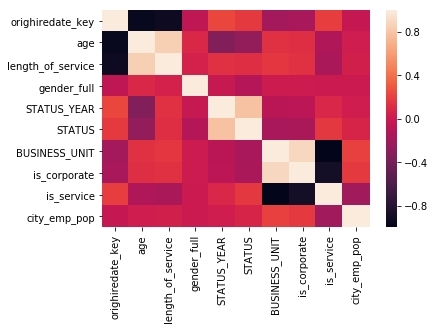

In [15]:
# Calculate the correlation matrix
corr = cleaned_data.corr()

# Plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

print(corr['STATUS'])

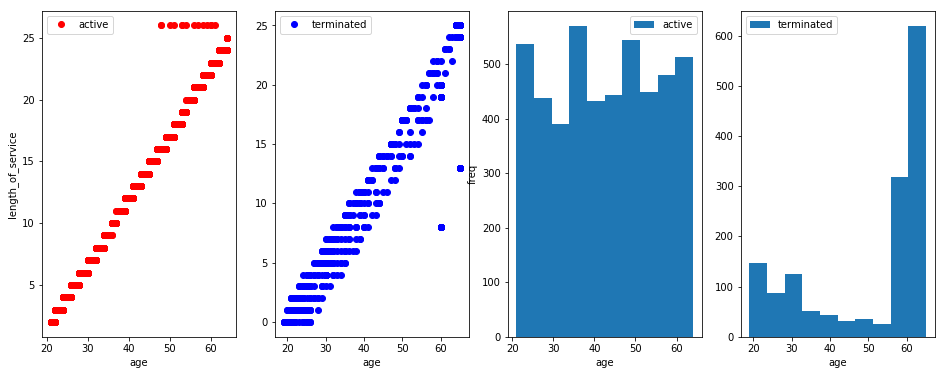

In [16]:
# Split the dataframe by active and terminated for easy comparison

active = cleaned_data[cleaned_data['STATUS']== 1]
terminated = cleaned_data[cleaned_data['STATUS']== 0]

fig = plt.figure(figsize=(16,6))
plt.subplot(141)
plt.plot(active['age'], active['length_of_service'], 'ro')
plt.xlabel('age')
plt.ylabel('length_of_service')
plt.legend(['active'])

plt.subplot(142)
plt.plot(terminated['age'], terminated['length_of_service'], 'bo')
plt.xlabel('age')
plt.legend(['terminated'])

plt.subplot(143)
plt.hist(active['age'])
plt.xlabel('age')
plt.ylabel('freq')
plt.legend(['active'])

plt.subplot(144)
plt.hist(terminated['age'])
plt.xlabel('age')
plt.legend(['terminated'])

plt.show()

# Majority of termination happened around age 60 and above, which indicates 60 is a cutoff for retirement

(array([134., 162., 164., 142., 123., 110., 130., 105., 253., 162.]),
 array([2006. , 2006.9, 2007.8, 2008.7, 2009.6, 2010.5, 2011.4, 2012.3,
        2013.2, 2014.1, 2015. ]),
 <a list of 10 Patch objects>)

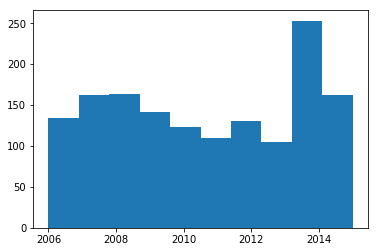

In [17]:
plt.hist(terminated['STATUS_YEAR'])

is_service    0         1
is_corporate  0   1     0
gender_full              
0             8  30  2968
1             8  34  3236

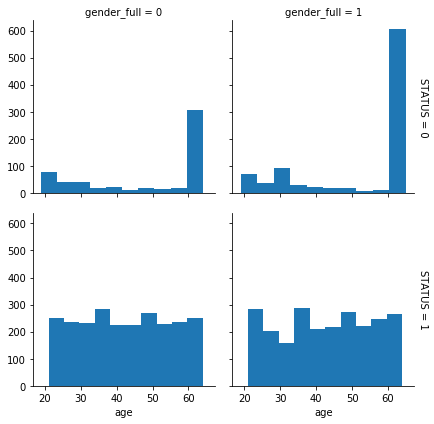

In [18]:
g = sns.FacetGrid(cleaned_data, col='gender_full', row='STATUS', palette='Set1_r', 
                  margin_titles=True)
g = g.map(plt.hist, 'age')

pd.crosstab(cleaned_data['gender_full'], [cleaned_data['is_service'], cleaned_data['is_corporate']])

# There are more female employees in the service sector, which may explain why the number of famle 
# employees terminating at age 60 and above

### 5. Building Models

In [19]:
# Split the data into test and train and make sure the distribution of test and train dataset are similar

y = cleaned_data['STATUS']
cleaned_data = cleaned_data.drop(columns = 'STATUS')

x_train, x_test, y_train, y_test = train_test_split(cleaned_data, y, test_size=0.30, random_state=45)

print(x_train.describe())
print(x_test.describe())

       orighiredate_key        age  length_of_service  gender_full  \
count         4398.0000  4398.0000          4398.0000    4398.0000   
mean          4366.8593    44.6132            12.7938       0.5223   
std           2508.0646    14.1135             6.7237       0.4996   
min              0.0000    19.0000             0.0000       0.0000   
25%           2234.2500    32.0000             7.0000       0.0000   
50%           4116.0000    45.0000            13.0000       1.0000   
75%           6555.7500    58.0000            19.0000       1.0000   
max           8871.0000    65.0000            26.0000       1.0000   

       STATUS_YEAR  BUSINESS_UNIT  is_corporate  is_service  city_emp_pop  
count    4398.0000      4398.0000     4398.0000   4398.0000     4398.0000  
mean     2013.9902         0.0125        0.0095      0.9875      533.0521  
std         2.3409         0.1111        0.0973      0.1111      494.6314  
min      2006.0000         0.0000        0.0000      0.0000      

In [20]:
# As an extra measure to prevent overfitting, models will be split into training and 
# validation sets. The final model will be applied to the test set

fold = KFold(n_splits = 5, shuffle = True, random_state = 999)

# Logistic regression

model_log = LogisticRegressionCV(cv=fold)
model_log.fit(x_train, y_train)
print ('Max training score:', model_log.scores_[1].max())

pred_log = np.array(model_log.predict(x_test))
print (ConfusionMatrix(list(y_test), list(pred_log)))
print('Test accuracy:', accuracy_score(y_test, pred_log))

# With this model, specificity(true negative rate) of 87% is achieved! The precision is 96%.
# Recall terminated status only accounted for 24% of the dataset. This is a great improvement over random guess

Max training score: 0.9761363636363637
  |    0    1 |
--+-----------+
0 | <415>  59 |
1 |    .<1412>|
--+-----------+
(row = reference; col = test)

Test accuracy: 0.9687168610816543


In [21]:
# SVM

models = {}
Cs=list(np.power(10.0, np.arange(-4, 2)))

for c in Cs:
    model_svc = SVC(C = c, kernel = 'linear')
    model_svc.fit(x_train, y_train)
    models[model_svc] = model_svc.score(x_train, y_train)

model_svc = max(models.keys(), key=lambda key: models[key])
print('Max training score:', models[model_svc] )

pred_svc = model_svc.predict(x_test)
print (ConfusionMatrix(list(y_test), list(pred_svc)))
print('Test accuracy:', accuracy_score(y_test, pred_svc))

# The specificity increased to 88% with this model. Precision stayed the same at 96%. However, this model was 
# much more computationally expensive


Max training score: 0.9756707594361074
  |    0    1 |
--+-----------+
0 | <427>  47 |
1 |    .<1412>|
--+-----------+
(row = reference; col = test)

Test accuracy: 0.9750795334040296


In [22]:
# KNN

neighbors = np.arange(2,15,1)
models = {}

for neighbor in neighbors:
    scores = []
    for train_index, test_index in fold.split(x_train):
        model_knn = KNeighborsClassifier(n_neighbors=neighbor, weights='distance')
        model_knn.fit(x_train.iloc[train_index], y_train.iloc[train_index])
        scores.append(model_knn.score(x_train.iloc[test_index], y_train.iloc[test_index]))
    models[model_knn] = np.mean(scores)
        
model_knn = max(models.keys(), key=lambda key: models[key])
print('Max training score:', models[model_knn] )

pred_knn = model_knn.predict(x_test)
print (ConfusionMatrix(list(y_test), list(pred_knn)))

print('Test accuracy:', accuracy_score(y_test, pred_knn))

# This method did not work as well as the others

Max training score: 0.8299257937739167
  |    0    1 |
--+-----------+
0 | <172> 302 |
1 |   69<1343>|
--+-----------+
(row = reference; col = test)

Test accuracy: 0.8032873806998939


In [23]:
# Gradient Boosting Classifier

learning_rates = np.arange(0.01, 0.2, 0.01)
models ={}

for learning_rate in learning_rates:
    scores = []
    for train_index, test_index in fold.split(x_train):
        model_gbc = GradientBoostingClassifier(learning_rate = learning_rate)
        model_gbc.fit(x_train.iloc[train_index], y_train.iloc[train_index])
        scores.append(model_gbc.score(x_train.iloc[test_index], y_train.iloc[test_index]))
    models[model_gbc] = np.mean(scores)
        
model_gbc = max(models.keys(), key=lambda key: models[key])
print('Max training score:', models[model_gbc] )

pred_gbc = model_gbc.predict(x_test)
print (ConfusionMatrix(list(y_test), list(pred_gbc)))

print('Test accuracy:', accuracy_score(y_test, pred_gbc))

# 99% accuracy, precision and specificity

Max training score: 0.998181042506981
  |    0    1 |
--+-----------+
0 | <470>   4 |
1 |    3<1409>|
--+-----------+
(row = reference; col = test)

Test accuracy: 0.996288441145281


### Conclusion

Given the dataset, 99% prediction accuracy was achieved. Although this is a toy problem, all the methods used can be applied to wide variety of real world problems